# International Paper Company (IP)
Last update: 9 Oct 2021  

Todo:
- ~~read annual report~~
- ~~research preferred stock~~
- ~~research new investment for 2012, 15, and 16 were bigger years. Why?~~
- ~~why is tax rate for 2013 and 2017 neg?~~
- ~~review Current news~~
- ~~review most reccient quarterly results~~
- ~~Need to verify year price plot for NAIC~~
- code up NAIC perfered method
- ~~Think about adding OHLC for each year~~
- ~~include preferred stock~~ none issued
- ~~under Accounts payable, see if anything else should be included.~~
- ~~need to fix some items in metrics section, look at excluding goodwill~~
- ~~copy items from blog write up~~
- ~~add comentary to blank observation sections.~~
- ~~spell check~~
- ~~update plots in the blog write up~~
- backup files


## Abstract
This notebook was developed to use as a template to analyze dividend paying companies as potential investments. This company was selected for analysis because it is on the Dividend Aristocrat list and passes the quick look tests.  

## Introduction
[International Paper Company](https://www.internationalpaper.com/performance) operates as a paper and packaging company primarily in the United States, the Middle East, Europe, Africa, Pacific Rim, Asia, and the rest of the Americas. It operates through three segments: Industrial Packaging, Global Cellulose Fibers, and Printing Papers.

Sector(s): Materials and Consumer Cyclical  
Industry: Packaging & Containers  
Earnings Date: Oct 27, 2021    
Ex-Dividend Date: Aug 13, 2021  

## Bottom line up front
Follow the link to the [Conclusion](#section11).

## Company description
[The International Paper Company (NYSE: IP)](https://en.wikipedia.org/wiki/International_Paper) is an American pulp and paper company, the largest such company in the world. It has approximately 56,000 employees, and is headquartered in Memphis, Tennessee.

**Revision history:**  
- 10/9/2021: Copied from APD notebook
- 10/16/2021: updating comments in this report 

## Analysis
The following sections of this notebook contain the financial analysis for the company.  

**Contents** <a id="section0"></a>  

1. [Quick look](#section1)
2. [ValuePro](#section2)
3. [Load financial statement data](#section3)
4. [NACI stock selection guide analysis](#section4)
5. [Format financial statements data](#section5)
6. [Discounted cash flow analysis, baseline](#section6)
7. [DCF Scenarios](#section7)
8. [Dividend Discount Model](#section8)
9. [Value analysis](#section9)
10. [Peer analysis](#section10) 
11. [Conclusion](#section11)
12. [Notes](#section12)
13. [References](#section13)

In [1]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from dateutil.parser import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## 1) Quick look <a id="section1"></a>
This section is completed first since the effort involved is much less compared to the other analysis sections in this notebook.  Some of the data looked at in this section is also available from the Fidelity company report.    

**Current news**  
Wed, October 13, 2021, International Paper Co (NYSE: IP) board of directors has approved a share repurchase program to acquire up to \\$2 billion of the company's common stock.  The company's board of directors also decreased the quarterly dividend by \\$0.05 per share or 9.8%, bringing the per-share dividend to \\$1.85 annually.

The dividend is being decreased by 9.8% from \\$0.5125 to \\$0.4625 per share for the period October 1 - December 31, inclusive, on the company's common stock, par value \\$1.00. This dividend is payable on December 15, 2021, to record holders on November 15, 2021.

**Review quarterly results**  
Take a look at recent quarterly results to see if trends from the previous annual report are in line.

TTM revenue (\\$21,341,000) is higher than for 2020 (\\$20,580,000), but lower than for 2019 (\\$22,376,000). Last 8 quarters show Gross Profit (Loss) trending down on the Fidelity Quarterly Income Statement page.  

Given the two red flags in the quick look, I normally would have stop the analysis of the company and moved on to consider a different company.  However, in this case I pressed on with my full analysis.

**Average daily volume**  
The average daily volume in the stock market needs to be high enough to be liquid and should be over 1 million.  
Average daily volume: 2,257,076 

**Dividend yield**  
Looking for a dividend yield between 2% to 6%.

In [2]:
# data from yahoo finance, on 9-26-2021
share_price = 54.39
dividend = 2.05 # Forward Dividend
print('dividend yield: {:.1f} %'.format(dividend/share_price*100))

dividend yield: 3.8 %


**Debt to equity ratio**  
The debt to equity ratio shows the proportion of equity and debt a company is using to finance its assets and signals the extent to which shareholder's equity can fulfill obligations to creditors, in the event of a business decline.

The debt to equity ratio compares a company’s total liabilities to its shareholder equity and can be used to evaluate how much leverage a company is using. Higher-leverage ratios tend to indicate a company with higher risk to shareholders. However, the D/E ratio is difficult to compare across industry groups where ideal amounts of debt will vary. Investors will often modify the D/E ratio to focus on long-term debt only because the risks associated with long-term liabilities are different than short-term debt and payables.

A good debt to equity ratio is around 1 to 1.5. However, the ideal debt to equity ratio will vary depending on the industry because some industries use more debt financing than others.

The industries that have the highest D/E ratios include utilities and financial services (D/E typically of 8).  Other industries that have a relatively higher ratio are capital-intensive industries, such as the airline industry or large manufacturing companies, which utilize a high level of debt financing as a common practice.

In [3]:
# data from yahoo finance, on 10-8-2021
debt = 10156000 # Long term Debt
equity = 7854000 # Stockholders' Equity
print('debt to equity ratio: {:.2f}'.format(debt/equity))

debt to equity ratio: 1.29


The Fidelity report gives the Total Debt to Equity: 108.5x

A D/E less than 2 is acceptable.

**Dividend Payout Ratio Using Earnings**  
The Dividend Payout Ratio (DPR) is the amount of dividends paid to shareholders in relation to the total amount of net income the company generates. In other words, the dividend payout ratio measures the percentage of net income that is distributed to shareholders in the form of dividends.

$\text{DPR} = \frac {\text{Total dividends}} {\text{Net income}}$  

The payout ratio is also useful for assessing a dividend's sustainability. Companies are extremely reluctant to cut dividends since it can drive the stock price down and reflect poorly on management's abilities. If a company's payout ratio is over 100%, it is returning more money to shareholders than it is earning and will probably be forced to lower the dividend or stop paying it altogether. That result is not inevitable, however.

For financially strong companies in these industries, a good dividend payout ratio is less than 75% of their earnings. However, companies in fast-growing sectors or those with more volatile cash flows and weaker balance sheets need a lower dividend payout ratio. Ideally, it should be below 50%.


In [4]:
dividend = 806000 # Common Stock Dividend Paid
earnings = 482000 # Net income
print('Dividend Payout Ratio Using Earnings: {:.2f}'.format(dividend/earnings))

Dividend Payout Ratio Using Earnings: 1.67


The net earnings for 2020 is less than half the net earnings for 2019.  This is why the payout ratio is above 1.

In [5]:
dividend = 796000  # Common Stock Dividend Paid, 2019
earnings = 1220000 # Net income, 2019
print('Dividend Payout Ratio for 2019 Using Earnings: {:.2f}'.format(dividend/earnings))

Dividend Payout Ratio for 2019 Using Earnings: 0.65


**Dividend Payout Ratio Using Cash Flow**  
Free Cash Flow Payout is simply Annual Dividend divided by Free Cash Flow.

$\text{FCFP} = \frac {\text{Dividends}} {\text{Free Cash Flow}}$  

It should be 70% or less.

https://seekingalpha.com/article/3148576-dividend-payout-vs-free-cash-flow-payout  
https://www.dividend-growth-stocks.com/2007/10/dividend-stock-and-etfcef-holdings.html  
https://dividendcultivator.com/2020/09/08/choose-your-dividend-payout-ratio-wisely-free-cash-flow-vs-income/  

In [6]:
# Dividend Payout Ratio Using Cash Flow
Cash_Flow = 2312000 # Cash, cash equivalents and restricted cash, end of year
print('Dividend Payout Ratio Using Cash Flow: {:.2f}'.format(dividend/Cash_Flow))

Dividend Payout Ratio Using Cash Flow: 0.34


## 2) ValuePro <a id="section1"></a>
[ValuePro](http://www.valuepro.net/index.shtml) is an online intrinsic value calculator based on the discounted free cash to the firm model.  The calculations follow the method described in [2].  The results are useful as a quick look, but I've sometimes found the inputs to the model to be very different from what I would use and the calculated intrinsic value is suspect.

Online valuation for the company on 10/3/2021 was: \\$26.93  
Share price is \\$54.39.  

## 3) Load financial statement data <a id="section3"></a>
Data from consolidated financial statements and annual reports was collected and entered into a spreadsheet. All numerical data is converted from thousands or millions of dollars to dollars.  The stock share price history was obtained from yahoo and is included as a tab in the spreadsheet.  Other tabs in the spreadsheet are various worksheets. 

In [7]:
ticker = 'IP' # company ticker symbol
os.chdir('/home/jim/Documents/Dividend Investing/DCF data/')

file_name = ticker+'_Financials.xlsx'
df_financials = pd.read_excel(file_name,sheet_name='DCF data')
df_NAIC_financials = pd.read_excel(file_name,sheet_name='NAIC data')
df_metrics = pd.read_excel(file_name,sheet_name='metrics')
df_price_history = pd.read_excel(file_name,sheet_name='Historical Prices')

# change the working director back to the Jupyter folder
os.chdir('/home/jim/Documents/JupyterLab/Discount Cash Flow Analysis/')

In [8]:
# convert dates from string to datetime format
price_date_list = []
for i in range(len(df_price_history)):
    price_date_list.append(datetime.strptime(str(df_price_history['Date'][i]), '%Y-%m-%d'))

df_price_history.insert(0, 'datetime', price_date_list)  # insert a new column with datetime data
df_price_history.sort_values(by=['datetime'], inplace=True) # sort data frame by datetime

df_price_history.set_index('datetime',inplace=True)

#df_price_history.head()

## 4) NACI stock selection guide analysis <a id="section4"></a>
This analysis follows the NAIC stock selection guide (SSG) [1].  The SSG relates revenue growth, EPS and share price history and makes a prediction about the future share price.    

The National Association of Investors Clubs (NAIC) is a nonprofit organization dedicated to educating individual investors and investment clubs to become successful lifelong investors.  NAIC's Stock Selection Guide (SSG) is used in the following cells to analyze the company's growth and whether the stock is selling at a reasonable price.

The SSG was originally developed in the 1950s as a paper worksheet by the not-for-profit National Association of Investors Corporation (NAIC). The SSG aims to aid individual investors in the fundamental analysis and selection of common stocks by reviewing components of a company's growth, quality, and value.

In [9]:
#column names: fiscal years 
years_list = df_NAIC_financials.columns[1:].values.astype('str')[::-1]

# convert years to datetime format
year_ended_list = []
for i in years_list:
    year_ended_list.append(datetime.strptime(i, '%Y'))

#line 0: revenue  
revenue = df_NAIC_financials.iloc[0].to_numpy()[1:].astype('float')[::-1]
#line 1: earnings per share
EPS = df_NAIC_financials.iloc[1].to_numpy()[1:].astype('float')[::-1]

**High and low price history for each year**  
From the daily price history obtained from yahoo finance, the high and low closing price for each is obtained and the data saved to the financial data frame as new columns.

In [10]:
fy_open = []
fy_close = []
fy_high = []
fy_low = []

for i in year_ended_list:
    start = i
    end = i + relativedelta(years=1)
    p1 = df_price_history.truncate(before=start, after=end)
    if len(p1) == 0:
        fy_open.append(np.nan)
        fy_close.append(np.nan)        
        fy_high.append(np.nan)
        fy_low.append(np.nan)
    else:
        fy_open.append(p1['Open'].iloc[0])
        fy_close.append(p1['Close'].iloc[-1])
        # use the closing price for each day  <<<--- changed to high, low
        fy_high.append(p1['High'].max())
        fy_low.append(p1['Low'].min())

# convert from list to numpy array
fy_open = np.asarray(fy_open)
fy_close = np.asarray(fy_close)
fy_high = np.asarray(fy_high)
fy_low = np.asarray(fy_low)

**Plotting the data**  
Page 1 of the SSG plots the price record of the stock, the past sales and past earnings per share on a semilog graph.  This was done to aid the investor in determining the rate of earnings growth.  Since the company is not in a rapid growth phase, the revenue from year to year is basically flat and the EPS varies from year to year.  The data is plotted on a linear scale. 

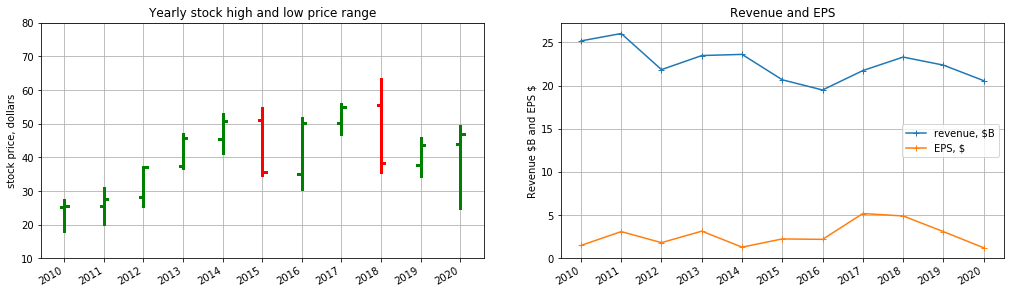

In [11]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

# figsize() function to adjust the size
plt.subplots(figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)
width = 3  # the width of the bars
# plt.bar(year_ended_list,fy_high-fy_low, width,bottom=fy_low,label='price')
j = 0
for i in year_ended_list:
    color = 'green'
    if fy_open[j] > fy_close[j]: color= 'red'
    # high/low lines
    plt.plot([i,i],[fy_low[j],fy_high[j]],color=color, linewidth=width)
    # open marker
    plt.plot([i,i-relativedelta(months=1)], [fy_open[j],fy_open[j]], color=color, linewidth=width)
    # close marker
    plt.plot([i,i+relativedelta(months=1)], [fy_close[j],fy_close[j]], color=color, linewidth=width)
    j += 1

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.ylim((10,80))
plt.title('Yearly stock high and low price range')
plt.ylabel('stock price, dollars')
#plt.legend()
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

plt.plot(year_ended_list,revenue/1e9,'+-',label='revenue, $B')
plt.plot(year_ended_list,EPS,'+-',label='EPS, $')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

#plt.yscale('log')
#plt.yticks([0.1,1,10,100,1000],['0.1','1','10','100','1000'])
#plt.ylim((1,100))
plt.title('Revenue and EPS')
plt.ylabel('Revenue \\$B and EPS \\$')
plt.legend()

plt.grid()

# space between the plots
plt.tight_layout(4)

# show plot
plt.show()

**Observations:**  
The open, close, high and low prices for each year are plotted on the left. Since 2014, the stock has traded in a flat range from the mid 20’s to the low 60’s. Revenue (net sales) for the past ten years has varied between \\$19B and \\$25B, with a slight downward trend over the 10 year period.  Earnings per share (EPS) ranged from \\$1.23 to \\$5.19 (basic EPS attributable to the company, common shareholders) with a downward trend over the past four years.  

**Price earnings history**  
Section 3 of the SSG is the Price-Earnings history.  The following table is built from the high and low prices each year and the earnings per share. The high and low Price/Earnings ratios are calculated for each year and are listed in the columns labeled high P/E and low P/E.

In [12]:
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('year','high','low','EPS',
    'high P/E','low P/E'))
for i in range(len(year_ended_list)):
    print('{:s}{:10,.2f}{:10,.2f}{:10,.2f}{:10,.2f}{:10,.2f}'.format(year_ended_list[i].strftime("%Y"),
        fy_high[i], fy_low[i],EPS[i],
        fy_high[i]/EPS[i],
        fy_low[i]/EPS[i]))

year      high       low       EPS  high P/E   low P/E
2010     27.32     18.05      1.50     18.21     12.03
2011     30.83     20.13      3.10      9.94      6.49
2012     37.24     25.49      1.82     20.46     14.00
2013     47.00     36.86      3.15     14.92     11.70
2014     52.77     41.32      1.30     40.60     31.78
2015     54.83     34.81      2.25     24.37     15.47
2016     51.78     30.78      2.20     23.54     13.99
2017     55.83     46.97      5.19     10.76      9.05
2018     63.39     35.56      4.91     12.91      7.24
2019     45.68     34.52      3.10     14.74     11.13
2020     49.23     24.98      1.23     40.03     20.31


**Average high and P/E for select years**   
The average price to earnings ratio based on high and low stock prices is calculated.

In [13]:
#Average high P/E for last five years 
pe_avg_high = (fy_high/EPS)[-5:].mean()
print('average high P/E {:.2f}'.format(pe_avg_high))
#Average low P/E for years 
pe_avg_low = (fy_low/EPS)[-5:].mean()
print('average low P/E {:.2f}'.format(pe_avg_low))

average high P/E 20.39
average low P/E 12.35


From the table above the average price to earnings ratio based on high and low stock prices are calculated.  The average high P/E is 20.39 and the average low P/E 12.35.

The method uses the average low and high P/E since the company will want to grow the earnings and the stock will probably not trade for a lower P/E that it has in the past 5 years.   An extreme severe market price may not have occurred in the past 5 years, so that possibility should also be considered. 

The preferred method for estimating future earnings per share is to use revenue growth, profit margin and tax rate.  Since this method requires additional data, the future EPS will be estimated from historical data trends.

To estimate the future EPS, a least squares fit is used to get the slope of the EPS data points.

**Estimate future EPS**  
A least squares fit is used to get the slope of the EPS data points.

In [14]:
# get linear fit for EPS
y = EPS
x = np.arange(len(y))
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print('EPS slope: {:.2f}'.format(m))

lstsq_fit = m*x + c  # data points for each year

EPS slope: 0.12


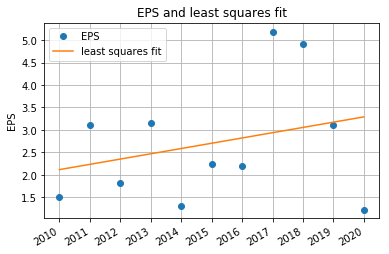

In [15]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('EPS')

ax1.plot(year_ended_list,EPS, 'o',label='EPS')
ax1.plot(year_ended_list,lstsq_fit, '-',label='least squares fit')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,4))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('EPS and least squares fit')
plt.show()

Using the equation for the best fit line, find the y value for the EPS point at five years in the future.

In [16]:
# estimated eps in 5 years
eps_5yr_est = m*(x[-1]+5) + c
print('estimated eps in 5 years: {:.1f}'.format(eps_5yr_est))

estimated eps in 5 years: 3.9


Using the high and low price to earning ratio from above and the projected EPS, calculate the range of stock price in five years.

In [17]:
#eps_5yr_est = 5  # user inputed value
print('estimated price range in 5 years: {:.2f} to {:.2f}'.format(eps_5yr_est*pe_avg_low,eps_5yr_est*pe_avg_high))

estimated price range in 5 years: 47.87 to 79.07


Using the high and low price to earning ratio from above and the projected EPS, the projected range of stock price in five years is estimated to be somewhere from \\$47.87 to \\$79.07 per share.  At the time of writing this report, the current stock price is \\$54 per share.  

Since the estimated range of future stock prices is higher than the current price, we can take this as a positive sign that the share price will trend up, if conditions remain reasonably constant.  

We are interested in the company primarily for the dividends it generates.  So if revenue and earnings are at least steady, then we can assume that the company can continue to pay dividends.  In any case, working through the NAIC analysis doesn’t raise any red flags, which it would if both revenue and earnings were in a declining trend. 

## 5) Format financial statements data <a id="section5"></a>
Generate a new data frame that holds the financial data needed for the DCF model.  Data from financial statements is copied into a spreadsheet which contains the data used in the analysis.  The data in the DCF_data tab is in a consistent format for ease of use by this notebook.  Standard names are used for the rows and columns.

In [18]:
#column names: fiscal years 
fy_data = df_financials.columns[1:].values.astype('datetime64[Y]')-1970
#line 0: Total revenue  
revenue_data = df_financials.iloc[0].to_numpy()[1:].astype('float')
#line 1: Cost of goods sold
Cost_of_goods_sold_data = df_financials.iloc[1].to_numpy()[1:].astype('float')
#line 2: General and administrative
General_and_administrative_data = df_financials.iloc[2].to_numpy()[1:].astype('float')
#line 3: Research and development
Research_and_development_data = df_financials.iloc[3].to_numpy()[1:].astype('float')
#line 4: Depreciation and amortization
Depreciation_and_amortization_data = df_financials.iloc[4].to_numpy()[1:].astype('float')
#line 5: Investment
Investment_data = df_financials.iloc[5].to_numpy()[1:].astype('float')
# line 6: Income before income taxes
Income_before_income_taxes_data = df_financials.iloc[6].to_numpy()[1:].astype('float')
# line 7: Income tax
Income_tax_data = df_financials.iloc[7].to_numpy()[1:].astype('float')
# line 8: Accounts receivable
Accounts_receivable_data = df_financials.iloc[8].to_numpy()[1:].astype('float')
# line 9: Inventories
Inventories_data = df_financials.iloc[9].to_numpy()[1:].astype('float')
# line 10: Accounts payable
Accounts_payable_data = df_financials.iloc[10].to_numpy()[1:].astype('float')
# line 11: Current assets
Current_assets_data = df_financials.iloc[11].to_numpy()[1:].astype('float')
# line 12: Current liabilities
Current_liabilities_data = df_financials.iloc[12].to_numpy()[1:].astype('float')
# line 13: Long term debt
Long_term_debt_data = df_financials.iloc[13].to_numpy()[1:].astype('float')
# line 14: Shares outstanding
Shares_outstanding_data = df_financials.iloc[14].to_numpy()[1:].astype('float')

In [19]:
# make a new data frame to store selected financial data
df_dcf_data = pd.DataFrame(data={
    'FY':fy_data[::-1],
    'revenue':revenue_data[::-1],
    'cost_of_goods_sold':Cost_of_goods_sold_data[::-1],
    'general_and_administrative':General_and_administrative_data[::-1],
    'research_and_development':Research_and_development_data[::-1],
    'depreciation':Depreciation_and_amortization_data[::-1],
    'investment':Investment_data[::-1],
    'income_before_income_taxes':Income_before_income_taxes_data[::-1],
    'income_tax':Income_tax_data[::-1],
    'accounts_receivable':Accounts_receivable_data[::-1],
    'inventories':Inventories_data[::-1],
    'accounts_payable':Accounts_payable_data[::-1], 
    'current_assets':Current_assets_data[::-1],
    'current_liabilities':Current_liabilities_data[::-1],
    'long_term_debt':Long_term_debt_data[::-1],
    'shares_outstanding':Shares_outstanding_data[::-1]
    })

#df_dcf_data

## 6) Discounted cash flow analysis, baseline <a id="section6"></a>
Discounted cash flow (DCF) is a valuation method used to estimate the value of an investment based on its expected future cash flows. DCF analysis attempts to figure out the value of an investment today, based on projections of how much money it will generate in the future. In finance, discounted cash flow (DCF) analysis is a method of valuing a security, project, company, or asset using the concepts of the time value of money. The DCF method used in this notebook follows [2].  

The value of any financial investment equals the present value of the expected future cash flows, discounted for risk and timing of these cash flows. The DCF method to value stocks is a four step process.  
1. Develop a set of future free cash flows for the corporation based on revenue growth, net operating profit margin, income tax rate and fix and working capital requirements.
2. Estimate the discount rate for the cash flows based on expected timing and risk.
3. Discount the cash flows and total them to calculate the value for the corporation as a whole.
4. Subtract the debt, preferred stock value and other claims and divide by the number of shares outstanding to get the intrinsic value.

Sections
- [Revenue growth rate](#section6-1) 
- [Net operating profit margin](#section6-2)
- [Tax rate](#section6-3)
- [Depreciation Rate](#section6-4)
- [Investment Rate](#section6-5)
- [Working Capital Rate](#section6-6)
- [Current Assets](#section6-7)
- [Current Liabilities](#section6-8)
- [Value of Debt Outstanding](#section6-9)
- [Current stock price](#section6-10)
- [Shares outstanding](#section6-11)
- [10 year treasury bond yield](#section6-12)
- [Bond yield spread to treasury](#section6-13)
- [Preferred stock yield](#section6-14)
- [Equity risk premium](#section6-15)
- [Company specific beta](#section6-16)
- [DCF model inputs](#section6-17)
- [Future cash flows](#section6-18)

### Revenue growth rate <a id="section6-1"></a>
The revenue growth rate (also sometimes called net sales) of the corporation plus any other revenues associated with the main operations of the business. It does not include dividends, interest income or non-operating income. Historic revenue data is obtained from consolidated income statements. The year over year change in revenue is calculated and converted to a percent, then an average revenue growth rate is calculated. 

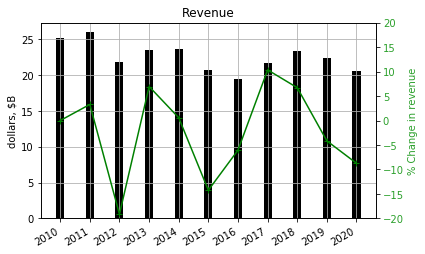

In [20]:
# calculate the percent change in revenue
pcr = np.zeros(len(df_dcf_data['revenue'].to_numpy())) # percent change in revenue
for i in range(len(df_dcf_data['revenue'].to_numpy()[0:-1])):
    pcr[i+1] = ((df_dcf_data['revenue'].to_numpy()[i+1] - df_dcf_data['revenue'].to_numpy()[i])/
                df_dcf_data['revenue'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $B')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['revenue']/1e9, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcr,'+-g')
    
ax2.set_ylabel('% Change in revenue',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((-20,20))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Revenue')
plt.show()

**Observation:**  
The graph shows that revenue is in a declining trend.  The average growth rate is calculated below.

In [21]:
rgr_avg = pcr[2:].mean()/100
print('average revenue growth rate: {:.2f}%'.format(rgr_avg*100))

average revenue growth rate: -3.08%


### Net operating profit margin <a id="section6-2"></a>
Net Operating Profit should reflect the future revenue generating ability and expense requirements of the operating business that comprise the ongoing operations of the company.

$\text{NOPM} = \frac{\text{Revenue} - \text{Expenses}}{\text{Revenue}}$  
 
$\text{Expenses} = \text{Cost of Goods Sold (CGS)} + \text{General and Administrative (G&A)} + \text{Research and Development (R&D)}$

Expenses are the sum of the Cost of Goods Sold (CGS), the General and Administrative (G&A) costs and the Research and Development (R&D) costs.  General and Administrative (G&A) is also sometimes called Sales, General and Administrative (SG&A).  The company has no Research and Development (R&D) expenses provided on the income or cash flow statements.

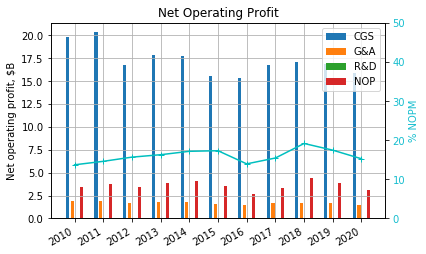

In [22]:
# NOP = (Revenue - Expenses)
nop = (df_dcf_data['revenue'].to_numpy() - \
    (df_dcf_data['cost_of_goods_sold'].to_numpy() + \
    df_dcf_data['general_and_administrative'].to_numpy() + \
    df_dcf_data['research_and_development'].to_numpy()) )

# net operating profit margin as percent of revenue
nopm = nop/df_dcf_data['revenue'].to_numpy()

# plot as four grouped bar chart with labels on right and working capital rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
x3_bar_position = []
x4_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=3))
    x2_bar_position.append(i-relativedelta(months=1))
    x3_bar_position.append(i+relativedelta(months=1))
    x4_bar_position.append(i+relativedelta(months=3))
    
width = 40  # the width of the bars
    
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Net operating profit, \\$B')

ax1.bar(x1_bar_position,df_dcf_data['cost_of_goods_sold'].to_numpy()/1e9, width,label='CGS')
ax1.bar(x2_bar_position,df_dcf_data['general_and_administrative'].to_numpy()/1e9, width,label='G&A')
ax1.bar(x3_bar_position,df_dcf_data['research_and_development'].to_numpy()/1e9, width,label='R&D')
ax1.bar(x4_bar_position,nop/1e9, width,label='NOP')

ax1.tick_params(axis='y')
#ax1.set_ylim((0,4))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:cyan'

ax2.plot(df_dcf_data['FY'],nopm*100,'+-c')
    
ax2.set_ylabel('% NOPM',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,50))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Net Operating Profit')
plt.show()

**Observation**  
The NOPM looks consistent over the years.  

Calculate the average net operating profit margin for the last 5 years.  

In [23]:
#Average net operating profit margin
nopm_avg = nopm[-5:].mean()
print('average net operating profit margin: {:.2f}%'.format(nopm_avg*100))

average net operating profit margin: 16.24%


The NOPM looks consistent over the years.  The average net operating profit margin for the last 5 years is 16.24%.

### Tax rate <a id="section6-3"></a>
Tax payments are taken from the consolidated income statement, provision for income taxes. 

$\text{Tax rate} = \frac{\text{Income taxes}}{\text{Income before income taxes}}$

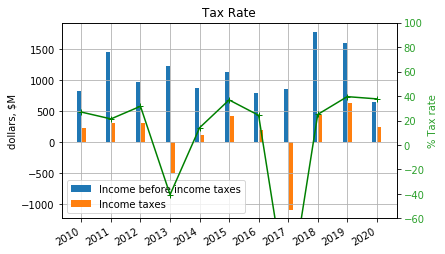

In [24]:
# plot as Grouped bar chart with labels on right and tax rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=1))
    x2_bar_position.append(i+relativedelta(months=1))

# calculate tax rate
tax_rate = df_dcf_data['income_tax']/df_dcf_data['income_before_income_taxes']

width = 50  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$M')

rects1 = ax1.bar(x1_bar_position,df_dcf_data['income_before_income_taxes']/1e6, width,
    label='Income before income taxes')
rects2 = ax1.bar(x2_bar_position,df_dcf_data['income_tax']/1e6, width,
    label='Income taxes')

ax1.tick_params(axis='y')
#ax1.set_ylim((-2e3,2e3))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],tax_rate * 100,'+-g')
    
ax2.set_ylabel('% Tax rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((-60,100))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Tax Rate')
plt.show()

**Observations**:  
Income taxes for years 2013 and 2017:  

From the 2013 annual report Income tax provision (523)  
The valuation allowance for deferred income tax assets as of December 31, 2013 was \\$413 million. The increase is primarily attributable to non-U.S. net operating losses that the Company currently does not foresee utilizing within the statutory carryforward period.

From the 2017 annual report, Income tax provision (1,085)  
On an unaudited pro forma basis, assuming the acquisition of the newly acquired pulp business had closed January 1, 2015, the consolidated results would have reflected Net sales of \\$20.8 billion and \\$22.2 billion and Earnings (loss) from continuing operations before income taxes and equity earnings of $942 million and \\$1.3 billion for the years ended December 31, 2016 and 2015, respectively.

In connection with our initial analysis of the impact of the Tax Act, we have recorded a provisional net tax benefit of \\$1.22 billion in the period ending December 31, 2017. The net tax benefit primarily consists of a net tax benefit for the re-measurement of U.S. deferred taxes of \\$1.454 billion and an expense for the Transition Tax of \\$231 million. For various reasons that are discussed more fully below, we have not completed our accounting for the income tax effects of the Tax Act.


In [25]:
# Average tax rate
tax_rate_avg = tax_rate.mean()
print('average tax rate: {:.2f}%'.format(tax_rate_avg*100))

average tax rate: 8.07%


### Depreciation Rate <a id="section6-4"></a>
The depreciation rate is used to project the future net investment cash flows.  The effect is to reduce the amount of FCFF. Depreciation amounts are from the Consolidated Statement of Cash Flows, Depreciation and Amortization.  

$\text{Depreciation Rate}=\frac{\text{Depreciation and Amortization}}{\text{Revenues}}$

Depreciation is the write off or expensing of a percentage of the historical cost of an asset over the asset's useful life.  Property, plant and equipment (PP&E) are long term or non current assets owned or controlled by the company and used to manufacture and or sell the company's products.  The balance sheet typically shows all categories of PP&E grouped together, net of accumulated depreciation.  Depreciation represents wear and tear on an asset or the fact that an asset gets used up over time.  Companies record depreciation expense in the income statement every year for all depreciable assets in service or used by the company during the year.  The difference between GAAP and Tax Accounting methods are handled through deferred taxes.

Amortization is the write off or expensing of the cost of a financial instrument or an intangible asset over the shorter of its useful life or legal life.  Amortization is similar to depreciation and reflects the declining useful life and value of the intangible asset over time.  Companies in research and development intensive fields typically have many patents.  Such industries include high technology, pharmaceuticals and chemicals. 

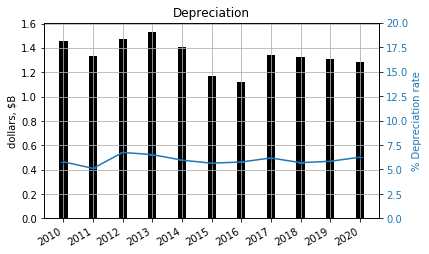

In [26]:
# depreciation rate
depreciation_rate = df_dcf_data['depreciation'] / df_dcf_data['revenue'].to_numpy()

# plot depreciation on left and rate on right
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, $B')

ax1.bar(df_dcf_data['FY'],df_dcf_data['depreciation']/1e9, width=100,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],depreciation_rate*100,'+-')
    
ax2.set_ylabel('% Depreciation rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,20))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Depreciation')
plt.show()

**Observations**:  
The depreciation rate is consistent over the years.

In [27]:
# average depreciation rate
depreciation_rate_avg = depreciation_rate[2:].mean()
print('average depreciation rate: {:.2f}%'.format(depreciation_rate_avg*100))

average depreciation rate: 6.07%


### Investment Rate <a id="section6-5"></a>
Taken from Consolidated Statement of Cash Flows, Cash used for investing activities.  Net investment in the dollar amount needed to support the growth of the firm.  Included investments in properties, plant equipment in excess of the depreciation expenses associated with past investments.  Net investment decreases the amount of money available to the stockholders.  Investment in property, plant and equipment is necessary to both maintain service and sales and also to grow revenues and profits.  Investment amounts should include capital expenditures and research and development. 

$Ir=\frac {\text {Capital Expenditures}}{\text{Revenues}}$ 

For this company, the yearly investment amounts are taken from the Consolidated Statements of Cash Flows, 
Net Cash Used in Investing Activities.

The following amounts are taken from the consolidated cash flow statement and summed to get the firm's yearly investment:
- Invested in capital projects, net of insurance recoveries
- Acquisitions, net of cash acquired
- Proceeds from sales of businesses, net of cash divested
- Proceeds from sale of fixed assets
- Other

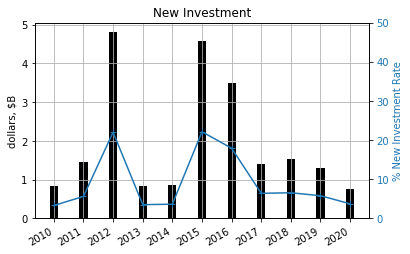

In [28]:
# investment rate
investment_rate = df_dcf_data['investment'] / df_dcf_data['revenue'].to_numpy()

# plot investment on left and rate on right
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$B')

ax1.bar(df_dcf_data['FY'],df_dcf_data['investment']/1e9, width=100,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],investment_rate*100,'+-')
    
ax2.set_ylabel('% New Investment Rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,50))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('New Investment')
plt.show()

**Observations**:  
The following investments were made for the years 2012, 2015 and 2016.

2012 Acquisitions, net of cash acquired \\$3.734B  
February 13, 2012: completed the acquisition of Temple-Inland, Inc. (Temple-Inland). International Paper acquired all of the outstanding common stock of Temple-Inland.

2015 Reduction of debt \\$6,947B

2016 Acquisitions \\$2.228B
December 1, 2016: finalized the purchase of Weyerhaeuser's pulp business for approximately $\\2.2 billion in cash.
June 30, 2016: completed the previously announced acquisition of Holmen Paper's newsprint mill in Madrid, Spain.

In [29]:
# average investment rate
investment_rate_avg = investment_rate.mean()
print('average investment rate: {:.2f}%'.format(investment_rate_avg*100))

average investment rate: 9.16%


### Working Capital Rate <a id="section6-6"></a>
Working capital is needed to support the corporate sales effort of any company.  Often a company’s incremental change in net working capital either positive or negative is approximately proportional to its change in revenue.

$\text{Working capital} = \text{Accounts Receivable} + \text{Inventories} - \text{Accounts Payable}$  

Working capital is a company’s net investment in its accounts receivable and its inventories (cash outflows), minus its accounts payable (a cash inflow).  Working capital and taxes are cash outflows from the corporation that are not available to pay debts and stockholders.

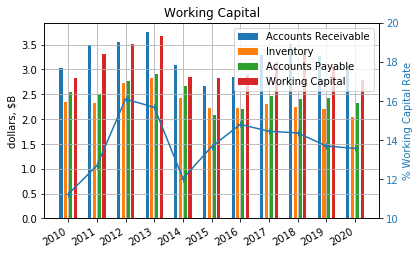

In [30]:
# plot as four grouped bar chart with labels on right and working capital rate on left
# calculate position of bars
x1_bar_position = []
x2_bar_position = []
x3_bar_position = []
x4_bar_position = []
for i in df_dcf_data['FY']:
    x1_bar_position.append(i-relativedelta(months=3))
    x2_bar_position.append(i-relativedelta(months=1))
    x3_bar_position.append(i+relativedelta(months=1))
    x4_bar_position.append(i+relativedelta(months=3))

# calculate working capital rate
working_capital = (df_dcf_data['accounts_receivable'] + df_dcf_data['inventories']) - \
    df_dcf_data['accounts_payable']
working_capital_rate = working_capital / df_dcf_data['revenue']

width = 40  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$B')

rects1 = ax1.bar(x1_bar_position,df_dcf_data['accounts_receivable']/1e9, width,\
    label='Accounts Receivable')
rects2 = ax1.bar(x2_bar_position,df_dcf_data['inventories']/1e9, width, label='Inventory')

rects2 = ax1.bar(x3_bar_position,df_dcf_data['accounts_payable']/1e9, width, label='Accounts Payable')
rects2 = ax1.bar(x4_bar_position,working_capital/1e9, width, label='Working Capital')

ax1.tick_params(axis='y')
#ax1.set_ylim((-50,200))
ax1.legend()
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:Blue'

ax2.plot(df_dcf_data['FY'],working_capital_rate * 100,'+-')
    
ax2.set_ylabel('% Working Capital Rate',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((10,20))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Working Capital')
plt.show()

**Observations:**  
Working capital rate has some variation, but overall constant over the years.

In [31]:
# average working capital rate
working_capital_rate_avg = working_capital_rate[-5:].mean()
print('average working capital rate: {:.2f}%'.format(working_capital_rate_avg*100))

average working capital rate: 14.18%


### Current assets <a id="section6-7"></a>
Total Current Assets from the most recent balance sheet statement of the company.  Current assets include inventory, cash and accounts receivables.

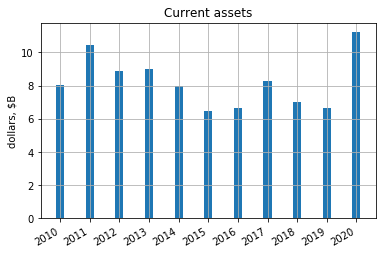

In [32]:
# plot Short Term Assets
width = 100  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

plt.bar(df_dcf_data['FY'],df_dcf_data['current_assets']/1e9, width)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Current assets')
plt.ylabel('dollars, \\$B')

plt.grid()
plt.show()

**Observations:**  
The plot of current assets for each year shows some variation year to year.  Except for 2020, the current assets have been declining year to year starting in 2011.  In 2020, \\$4.85B of assets was claimed for installment notes (the "Timber Notes") related to the 2006 sale of approximately 5.6 million acres of forestland. The Timber Notes were used as collateral for borrowings from third party lenders, which effectively monetized the Timber Notes through the creation of newly formed special purpose entities (the "Entities").

In [33]:
sta = df_dcf_data['current_assets'].iloc[-1]
print('Current assets: ${:.2f}B'.format(sta/1e9))

Current assets: $11.24B


### Current liabilities <a id="section6-8"></a>
Total Current Liabilities from the most recent balance sheet consolidated statement.

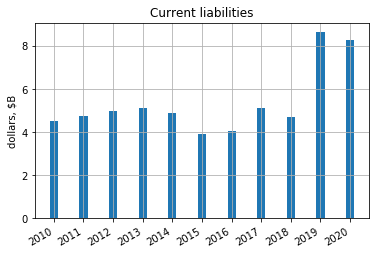

In [34]:
# plot Short Term Liabilities

width = 100  # the width of the bars

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

plt.bar(df_dcf_data['FY'],df_dcf_data['current_liabilities']/1e9, width)

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Current liabilities')
plt.ylabel('dollars, \\$B')

plt.grid()
plt.show()

In [35]:
print('Average of current liabilities: ${:.2f}B'.format(df_dcf_data['current_liabilities'].mean()/1e9))

Average of current liabilities: $5.36B


**Observations**:  
In 2019 there is a line item on the consolidated balance sheet of \\$4.22B for Current nonrecourse financial liabilities of variable interest entities (Note 15).  The explanation in note 15 is as follows: The Extension Loans are shown in Current nonrecourse financial liabilities of variable interest entities on the accompanying consolidated balance sheet and mature in the fourth quarter of 2020. These bank loans, totaling approximately \\$4.2 billion, are nonrecourse to the Company, and are secured by approximately \\$4.8 billion of Timber Notes.

In [36]:
stl = df_dcf_data['current_liabilities'].iloc[-1]
print('Current liabilities: ${:.2f}B'.format(stl/1e9))

Current liabilities: $8.28B


### Value of Debt Outstanding <a id="section6-9"></a>
Amount of debt outstanding from the most recent balance sheet of the company.


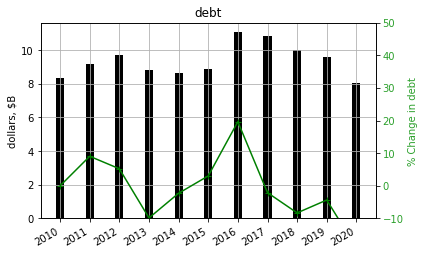

In [37]:
# calculate the percent change in debt, pcd
pcd = np.zeros(len(df_dcf_data['long_term_debt'].to_numpy())) # percent change in debt
for i in range(len(df_dcf_data['long_term_debt'].to_numpy()[0:-1])):
    pcd[i+1] = ((df_dcf_data['long_term_debt'].to_numpy()[i+1] - df_dcf_data['long_term_debt'].to_numpy()[i])/
                df_dcf_data['long_term_debt'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('dollars, \\$B')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['long_term_debt']/1e9, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcd,'+-g')
    
ax2.set_ylabel('% Change in debt',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((-10,50))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('debt')
plt.show()

In [38]:
dgr_avg = pcr[1:].mean()/100
print('average debt growth rate: {:.2f}%'.format(dgr_avg*100))

average debt growth rate: -2.45%


**Observations:**  
The general level of debt is consistent from year to year with some variation and the debt has been falling the five years. 

In [39]:
vod = df_dcf_data['long_term_debt'].iloc[-1]
print('Total long term debt and other: ${:.2f}B'.format(vod/1e9))

Total long term debt and other: $8.06B


### Current stock price <a id="section6-10"></a>
Most recent stock price for the [company](https://finance.yahoo.com/quote/T/?p=T).  The current stock price is used to calculate the market value of the firm. Use the market value when looking at market capitalization for common stock. 

In [40]:
csp = 54.39 # current stock price, $
print('current stock price: ${:,.2f}'.format(csp))

current stock price: $54.39


### Shares outstanding <a id="section6-11"></a>
The number of shares outstanding is used to calculate the intrinsic stock value.  


In [41]:
so = df_dcf_data['shares_outstanding'].iloc[-1]               # shares outstanding
print('shares_outstanding, basic: {:,.0f}'.format(so))

shares_outstanding, basic: 448,900,000


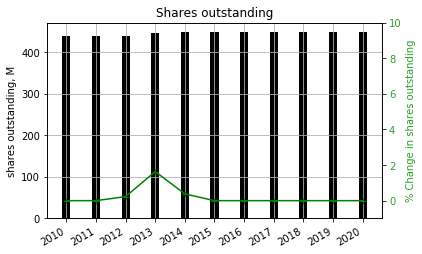

In [42]:
# calculate the percent change in shares outstanding, pcso
pcso = np.zeros(len(df_dcf_data['shares_outstanding'].to_numpy())) # percent change in debt
for i in range(len(df_dcf_data['shares_outstanding'].to_numpy()[0:-1])):
    pcso[i+1] = ((df_dcf_data['shares_outstanding'].to_numpy()[i+1] - df_dcf_data['shares_outstanding'].to_numpy()[i])/
                df_dcf_data['shares_outstanding'].to_numpy()[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('shares outstanding, M')

# plot revenue as single bar
plt.bar(df_dcf_data['FY'],df_dcf_data['shares_outstanding']/1e6, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(df_dcf_data['FY'],pcso,'+-g')
    
ax2.set_ylabel('% Change in shares outstanding',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((-1,10))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Shares outstanding')
plt.show()

In [43]:
print('average shares outstanding growth rate: {:.2f}%'.format(pcso[1:].mean()))

average shares outstanding growth rate: 0.22%


**Observation:**  
The number of shares outstanding is steady from year to year. 

### 10 year treasury bond yield <a id="section6-12"></a>
The [10 year treasury yield](https://finance.yahoo.com/quote/%5ETNX?p=^TNX&.tsrc=fin-srch) is used as a measure of the risk free rate.   

In [44]:
tby = 1.38/100             # 10 year treasury bond yield
print('10 year treasury bond yield: {:,.2f}%'.format(tby*100))

10 year treasury bond yield: 1.38%


### Bond yield spread to treasury <a id="section6-13"></a>
The spread to treasury implies that all corporate debt will have a higher yield than yields associated with comparable maturity US Treasury Bonds.  The best way to determine default risk is to see how a particular company's debt is trading in the market and compare it on a spread basis with comparable maturity yields.  

Look at [PIMCO Active Bond Exchange-Traded Fund (BOND)](https://finance.yahoo.com/quote/BOND?p=BOND) or use a default rating systems that are published by the three major rating agencies, Standards and Poors Corp, Moody’s Investor Services and Fitch & Company.

Web resources:
- http://www.standardpoor.com/  
- http://bond.yahoo.com/rates.html  
- http://www.moodys.com/cust/default.asp  
- http://www.fitchibca.com/corporate/index.cfm  

In [45]:
bystt = (2.53-1.38)/100           # bond yield spread to treasury spread
print('Bond yield spread to treasury: {:,.2f}%'.format(bystt*100))

Bond yield spread to treasury: 1.15%


### Preferred stock yield <a id="section6-14"></a>
Amount of preferred stock outstanding from the most recent balance sheet of the company.

The company has not issued preferred stock.

In [46]:
psy = 0/100  # preferred stock yield
print('preferred stock yield: {:,.2f}%'.format(psy*100))

vps = 0 # value of preferred stock
print('value of preferred stock: {:,.2f}'.format(vps))

preferred stock yield: 0.00%
value of preferred stock: 0.00


### Equity risk premium <a id="section6-15"></a>
The expected excess return a hypothetical average investor would require of a diversified portfolio of stock (assumed beta = 1.0) over the yield on the 10-year Treasury Bond.  The equity risk premium has been going down over the years.  
- 1926 to 1990: 5.5%   
- 1962 to 1990: 3.25%   
- 1981 to 1990: 0.19%   

In times of sustained economic growth the risk premium demanded by investors generally declines.   

I'm going to use 3% as the equity risk premium.

In [47]:
eq_rp = 3.0/100             # equity risk premium
print('Equity risk premium: {:,.2f}%'.format(eq_rp*100))

Equity risk premium: 3.00%


### Company specific beta <a id="section6-16"></a>
The Beta used is Beta of Equity. Beta is the monthly price change of a particular company relative to the monthly price change of the S&P 500. The time period for Beta is 5 years when available. This value can be obtained at [yahoo finance](https://finance.yahoo.com/quote/ED/?p=ED).  

A measure of risk of an individual stock. It measures volatility of return - a higher beta means a higher risk. A financial model that uses Beta as its sole measure of risk (signal factor model) is called a Capital Asset Pricing Model (CAPM).
 

In [48]:
beta = 1.05 # company specific beta
print('Company specific beta: {:,.2f}'.format(beta))

Company specific beta: 1.05


### DCF model inputs <a id="section6-17"></a>
Below are the DCF model inputs.  These values were calculated above.

In [49]:
erp = 10                  # excess return period, years
print('excess return period: {:,.0f} years'.format(erp))
rev_start = df_dcf_data['revenue'].to_numpy()[-1] # starting revenues for excess return period
print('starting revenues: ${:,.3f}B'.format(rev_start/1e9))

# various inputs
print('current stock price: ${:,.2f}'.format(csp))

print('Current assets: ${:.3f}B'.format(sta/1e9))
print('Current liabilities: ${:.3f}B'.format(stl/1e9))
print('Total long term debt and other: ${:.3f}B'.format(vod/1e9))
print('current stock price: ${:,.2f}'.format(csp))
print('shares_outstanding, basic: {:,.0f}'.format(so))
print('10 year treasury bond yield: {:,.2f}%'.format(tby*100))
print('Bond yield spread to treasury: {:,.2f}%'.format(bystt*100))
print('preferred stock yield: {:,.2f}%'.format(psy*100))
print('value of preferred stock: {:,.2f}'.format(vps))
print('Equity risk premium: {:,.2f}%'.format(eq_rp*100))
print('Company specific beta: {:,.2f}'.format(beta))

excess return period: 10 years
starting revenues: $20.580B
current stock price: $54.39
Current assets: $11.236B
Current liabilities: $8.284B
Total long term debt and other: $8.064B
current stock price: $54.39
shares_outstanding, basic: 448,900,000
10 year treasury bond yield: 1.38%
Bond yield spread to treasury: 1.15%
preferred stock yield: 0.00%
value of preferred stock: 0.00
Equity risk premium: 3.00%
Company specific beta: 1.05


In [50]:
# various rates
rgr = rgr_avg              # revenue growth rate
print('revenue growth rate: {:,.3f}%'.format(rgr*100))
nopm = nopm_avg             # net operating profit margin
print('net operating profit margin: {:,.3f}%'.format(nopm*100))
tr = tax_rate_avg               # tax rate
print('tax rate: {:,.3f}%'.format(tr*100))
dr = depreciation_rate_avg              # depreciation rate (% of revenue)
print('depreciation rate: {:,.3f}%'.format(dr*100))
ir = investment_rate_avg              # investment rate (% of revenue)
print('investment rate: {:,.3f}%'.format(ir*100))
wcr = working_capital_rate_avg            # working capital rate (% of revenue)
print('working capital rate: {:,.3f}%'.format(wcr*100))

revenue growth rate: -3.083%
net operating profit margin: 16.237%
tax rate: 8.071%
depreciation rate: 6.065%
investment rate: 9.156%
working capital rate: 14.180%


In [51]:
# General Inputs
fy_start = df_dcf_data['FY'].iloc[-1].year # fiscal year to start excess return period
erp = 10                  # excess return period, years
rev_start = df_dcf_data['revenue'].to_numpy()[-1] # starting revenues for excess return period
print('starting revenues: ${:,.2f}B'.format(rev_start/1e9))
print('shares outstanding: {:,.0f}'.format(so))

starting revenues: $20.58B
shares outstanding: 448,900,000


In [52]:
ps_mv = vps               # preferred stock, market value 
print('preferred stock, market value : ${:,.2f}B'.format(ps_mv/1e9))
cs_mv = csp*so            # common stock, market value 
print('common stock, market value: ${:,.2f}B'.format(cs_mv/1e9))

preferred stock, market value : $0.00B
common stock, market value: $24.42B


**Long Term Debt, Market Value, ltd_mv**  
Use the book value for long term debt.  Various online resources can be used to research this item.
These include, [Bondsonline](http://www.bondsonline.com/) and [Bloomberg](http://www.bloomberg.com/).  The book value of debt and preferred stock is an accounting measure that relates to how much money was raised by the company when each security was issued.  The market value of debt and the preferred and common stock is the price that specific obligations would trade at in today’s market. 

Long term debt for firms can take one of two forms.  It can be a long-term loan from a bank or other financial institution or it can be a long-term bond issued to financial markets, in which case the creditors are the investors in the bond.  Firms often have long term obligations that are not captured in the long term debt item.  These include obligations to lessors on assets that firms have leased, to employees in the form of pension fund and health care benefits yet to be paid, and to the government in the form of taxes deferred.  In the last two decades, accountants have increasingly moved towards quantifying these liabilities and showing them as long term liabilities.

In [53]:
ltd_mv = vod              # market value of long term debt
tmv = ltd_mv+ps_mv+cs_mv  # total market value 
print('total market value: ${:,.2f}B'.format(tmv/1e9))

total market value: $32.48B


**Cost of Common Equity, cce**  
The expected excess return a hypothetical average investor would require of a diversified portfolio of stock (assumed beta = 1.0) over the yield on the 10-year Treasury Bond.  The annual rate of return that an investor expects to earn when investing in shares of a company is known as the cost of common equity.  It includes dividends and increases in the market value.

In [54]:
cce = tby+beta*eq_rp      # cost of common equity or the expected return for the stock
print('cost of common equity: {:,.2f}%'.format(cce*100))

cost of common equity: 4.53%


**Long Term Debt, Average Yield, ltd_ay**  
The total cost of long term debt.

In [55]:
ltd_ay = tby+bystt        # long term debt average yield
print('long term debt average yield: {:,.2f}%'.format(ltd_ay*100))

long term debt average yield: 2.53%


**Long Term Debt, After Tax Yield, ltd_aty**  
The tax benefits of long term debt.  Interest payments are tax deductible for the company.

In [56]:
ltd_aty = ltd_ay*(1-tr)   # long term debt after tax yield
print('long term debt after tax yield: {:,.2f}%'.format(ltd_aty*100))

ltd_pc = vod/tmv          # weight for long term debt 
ltd_ate = ltd_aty*ltd_pc  # after tax effect of long term debt 
ps_ay = psy               # preferred stock, average yield 
ps_aty = ps_ay            # preferred stock, average yield 
print('preferred stock, average yield: {:,.2f}%'.format(ps_aty*100))

ps_pc = ps_mv/tmv         # preferred stock, % capital 
ps_ate = ps_aty*ps_pc     # preferred stock, after tax effect 
cs_ay = cce               # common stock, average yield 
cs_aty = cce              # common stock, after tax yield 
print('common stock, after tax yield: {:,.2f}%'.format(cs_aty*100))

cs_pc = cs_mv/tmv         # common stock, % capital 
cs_ate = cs_aty*cs_pc     # common stock, after tax effect 
print('common stock, after tax effect: {:,.2f}%'.format(cs_ate*100))

tate = ltd_ate+ps_ate+cs_ate # total after tax effect 
print('total after tax effect: {:,.2f}%'.format(tate*100))
tpc = ltd_pc+ps_pc+cs_pc     # total % Capital
print('total % Capital: {:,.2f}%'.format(tpc*100))

long term debt after tax yield: 2.33%
preferred stock, average yield: 0.00%
common stock, after tax yield: 4.53%
common stock, after tax effect: 3.41%
total after tax effect: 3.98%
total % Capital: 100.00%


**Weighted average cost of capital**  
A company's weighted average cost of capital (WACC) is the weighted average of the company's current cost of debt and equity calculated by using current debt, preferred stock and common stock market values.  The WACC of the company, calculated after tax, is the discount rate used in the DCF valuation procedures. The WACC, which is the cost of the different components of financing used by the firm, weighted by their market value proportions.  These include debt, preferred stock, and common stock.

WACC: Weighted Average Cost of Capital, the rate used to discount cash flows, based on the following three factors.
1. Base rate of return.
2. Expected return based on debt and preferred stock.
3. Expected return on common stock and Beta.

All adjusted for the tax advantage of interest payments and the percentage of debt, preferred stock and common stock.

In [57]:
wacc = tate
print('weighted average cost of capital: {:.1f}%'.format(wacc*100))

weighted average cost of capital: 4.0%


### Future cash flows <a id="section6-18"></a>
The future cash flows to the firm are projected based on revenue growth.  The cash flows are then discounted using the WACC and the ISV is calculated.

In [58]:
# make a list of the fiscal years in excess return period 
fy = np.zeros(erp+1)
fy[0] = fy_start
for i in range(1,erp+1): 
    fy[i]=fy_start+i

rev = np.zeros(len(fy))
ciwc = np.zeros(len(fy))
rev[0] = rev_start  #*rgr+rev_start   # find the future revenue using constant revenue growth rate 

for i in range(1,len(fy)): 
    rev[i] = rev[i-1]*rgr+rev[i-1]  # find the future revenue 
    ciwc[i] = (rev[i]-rev[i-1])*wcr  # find the change in working capital 

nop = np.zeros(len(fy))
adj_taxes = np.zeros(len(fy))
nopat = np.zeros(len(fy))
invest = np.zeros(len(fy))
depre = np.zeros(len(fy))
net_invest = np.zeros(len(fy))
fcff = np.zeros(len(fy))
disc_fact = np.zeros(len(fy))
disc_fcff = np.zeros(len(fy))                

# calculate values in table 
for i in range(1,len(fy)): 
    nop[i] = rev[i]*nopm # net operating profit
    adj_taxes[i] = nop[i]*tr # net operating profit adjusted for taxes
    nopat[i] = nop[i]-adj_taxes[i] # after tax net operating profit
    invest[i] = rev[i]*ir # future investments
    depre[i] = rev[i]*dr # future depreciations
    net_invest[i] = invest[i]-depre[i] # net investments
    fcff[i] = nopat[i]-net_invest[i]-ciwc[i] # free cash flow to the firm
    disc_fact[i] = 1/((1+wacc)**i) # discount factor
    disc_fcff[i] = disc_fact[i]*fcff[i] # discounted free cash flow to the firm
    
dcrv = nopat[-1]/wacc*disc_fact[-1] # discounted corporate residual value
derp_fcff = disc_fcff.sum() # discounted excess return period FCFF

tcv = derp_fcff+dcrv+sta # total corporate value
tvce = tcv-vod-vps-stl # total value of common equity
isv = tvce/so # intrinsic stock value

# print cash flows in a table
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('Year','Rev','NOP','AdjTaxes',
    'NOPAT','Invest.','Deprec.','dInvest.','dWC','FCFF','DF','DF*FCFF'))
for i in range(len(fy)):
    print('{:4.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.4f}{:10,.0f}'.format(fy[i],
        rev[i]/1e6,nop[i]/1e6,adj_taxes[i]/1e6,nopat[i]/1e6,invest[i]/1e6,depre[i]/1e6,(invest[i]-depre[i])/1e6,ciwc[i]/1e6,
        fcff[i]/1e6,disc_fact[i],disc_fcff[i]/1e6))

Year       Rev       NOP  AdjTaxes     NOPAT   Invest.   Deprec.  dInvest.       dWC      FCFF        DF   DF*FCFF
2020    20,580         0         0         0         0         0         0         0         0    0.0000         0
2021    19,946     3,239       261     2,977     1,826     1,210       616       -90     2,451    0.9617     2,357
2022    19,331     3,139       253     2,885     1,770     1,172       597       -87     2,375    0.9249     2,197
2023    18,735     3,042       246     2,796     1,715     1,136       579       -85     2,302    0.8894     2,047
2024    18,157     2,948       238     2,710     1,662     1,101       561       -82     2,231    0.8554     1,908
2025    17,597     2,857       231     2,627     1,611     1,067       544       -79     2,162    0.8226     1,779
2026    17,055     2,769       224     2,546     1,561     1,034       527       -77     2,096    0.7911     1,658
2027    16,529     2,684       217     2,467     1,513     1,003       511      

In [59]:
# Intrinsic Value
print('discounted excess return period FCFF: ${:,.2f}B'.format(derp_fcff/1e9))
print('discounted corporate residual value: ${:,.2f}B'.format(dcrv/1e9))
print('total corporate value: ${:,.2f}B'.format(tcv/1e9))
print('total value of common equity: ${:,.2f}B'.format(tvce/1e9))
print('intrinsic stock value: ${:,.2f}'.format(isv))
print('current stock price: ${:,.2f}'.format(csp))

discounted excess return period FCFF: $17.52B
discounted corporate residual value: $38.16B
total corporate value: $66.92B
total value of common equity: $50.57B
intrinsic stock value: $112.66
current stock price: $54.39


**Observations:**  
The basic DCF analysis produces an intrinsic stock value of \\$112, which is about double the current price.  By the DCF method, using the basic inputs to the model we can conclude the stock is selling at a discount to the intrinsic value.  

The calculations used here can be verified by using the [Valuepro](http://www.valuepro.net/index.shtml) web site, which calculates ISV based on the same method.

## 7) DCF Scenarios <a id="section7"></a>
Adjusting the weighted average cost of capital to 10.0% to reflect a higher interest and inflation period in the future and changing the revenue growth rate to a modest 1.00%.

In [60]:
wacc = 0.1 # weighted average cost of capital
print('weighted average cost of capital: {:.1f}%'.format(wacc*100))

rgr = 0.01  # revenue growth rate
print('revenue growth rate: {:,.2f}%'.format(rgr*100))

#nopm = 0.03             # net operating profit margin
#print('net operating profit margin: {:,.2f}%'.format(nopm*100))

weighted average cost of capital: 10.0%
revenue growth rate: 1.00%


In [61]:
# make a list of the fiscal years in excess return period 
fy = np.zeros(erp+1)
fy[0] = fy_start
for i in range(1,erp+1): 
    fy[i]=fy_start+i

rev = np.zeros(len(fy))
ciwc = np.zeros(len(fy))
rev[0] = rev_start  #*rgr+rev_start   # find the future revenue using constant revenue growth rate 

for i in range(1,len(fy)): 
    rev[i] = rev[i-1]*rgr+rev[i-1]  # find the future revenue 
    ciwc[i] = (rev[i]-rev[i-1])*wcr  # find the change in working capital 

nop = np.zeros(len(fy))
adj_taxes = np.zeros(len(fy))
nopat = np.zeros(len(fy))
invest = np.zeros(len(fy))
depre = np.zeros(len(fy))
net_invest = np.zeros(len(fy))
fcff = np.zeros(len(fy))
disc_fact = np.zeros(len(fy))
disc_fcff = np.zeros(len(fy))                

# calculate values in table 
for i in range(1,len(fy)): 
    nop[i] = rev[i]*nopm # net operating profit
    adj_taxes[i] = nop[i]*tr # net operating profit adjusted for taxes
    nopat[i] = nop[i]-adj_taxes[i] # after tax net operating profit
    invest[i] = rev[i]*ir # future investments
    depre[i] = rev[i]*dr # future depreciations
    net_invest[i] = invest[i]-depre[i] # net investments
    fcff[i] = nopat[i]-net_invest[i]-ciwc[i] # free cash flow to the firm
    disc_fact[i] = 1/((1+wacc)**i) # discount factor
    disc_fcff[i] = disc_fact[i]*fcff[i] # discounted free cash flow to the firm
    
dcrv = nopat[-1]/wacc*disc_fact[-1] # discounted corporate residual value
derp_fcff = disc_fcff.sum() # discounted excess return period FCFF

tcv = derp_fcff+dcrv+sta # total corporate value
tvce = tcv-vod-vps-stl # total value of common equity
isv = tvce/so # intrinsic stock value

# print cash flows in a table
print('{:4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format('year','rev','nop','at',
    'nopat','invest','depre','ci','ciwc','FCFF','disc','dFCFF'))
for i in range(len(fy)):
    print('{:4.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.0f}{:10,.4f}{:10,.0f}'.format(fy[i],
        rev[i]/1e6,nop[i]/1e6,adj_taxes[i]/1e6,nopat[i]/1e6,invest[i]/1e6,depre[i]/1e6,(invest[i]-depre[i])/1e6,ciwc[i]/1e6,
        fcff[i]/1e6,disc_fact[i],disc_fcff[i]/1e6))

year       rev       nop        at     nopat    invest     depre        ci      ciwc      FCFF      disc     dFCFF
2020    20,580         0         0         0         0         0         0         0         0    0.0000         0
2021    20,786     3,375       272     3,103     1,903     1,261       642        29     2,431    0.9091     2,210
2022    20,994     3,409       275     3,134     1,922     1,273       649        29     2,455    0.8264     2,029
2023    21,204     3,443       278     3,165     1,941     1,286       655        30     2,480    0.7513     1,863
2024    21,416     3,477       281     3,197     1,961     1,299       662        30     2,505    0.6830     1,711
2025    21,630     3,512       283     3,229     1,980     1,312       668        30     2,530    0.6209     1,571
2026    21,846     3,547       286     3,261     2,000     1,325       675        31     2,555    0.5645     1,442
2027    22,065     3,583       289     3,293     2,020     1,338       682      

In [62]:
# Intrinsic Value
print('discounted excess return period FCFF: ${:,.2f}B'.format(derp_fcff/1e9))
print('discounted corporate residual value: ${:,.2f}B'.format(dcrv/1e9))
print('total corporate value: ${:,.2f}B'.format(tcv/1e9))
print('total value of common equity: ${:,.2f}B'.format(tvce/1e9))
print('intrinsic stock value: ${:,.2f}'.format(isv))

discounted excess return period FCFF: $15.51B
discounted corporate residual value: $13.08B
total corporate value: $39.83B
total value of common equity: $23.48B
intrinsic stock value: $52.30


The DCF model calculates an intrinsic stock value of \\$52.30.  This is inline with the current price.  

Since we don’t see a big disparity between the intrinsic value of the basic case and this scenario to the current price, we can assume the company is trading near fair value.

## 8) Dividend Discount Model <a id="section8"></a>

Dividend Discount Model – DDM
The dividend discount model (DDM) is a quantitative method used for predicting the price of a company's stock based on the theory that its present-day price is worth the sum of all of its future dividend payments when discounted back to their present value.   
https://www.investopedia.com/terms/d/ddm.asp   
https://www.fidelity.com/learning-center/trading-investing/fundamental-analysis/dividends-cash-flow-earnings-discount-models   
https://en.wikipedia.org/wiki/Dividend_discount_model  

#### The Gordon Growth Model
The Gordon growth model can be used to value a firm that is in 'steady state' with dividends growing at a rate that can be sustained forever.


In [63]:
#column names: fiscal years 
years_list = df_metrics.columns[1:].values.astype('str')[::-1]

# convert years to datetime format
year_ended_list = []
for i in years_list:
    year_ended_list.append(datetime.strptime(i, '%Y'))

In [64]:
#line 8: Dividends per share  
dps = df_metrics.iloc[8].to_numpy()[1:].astype('float')[::-1]

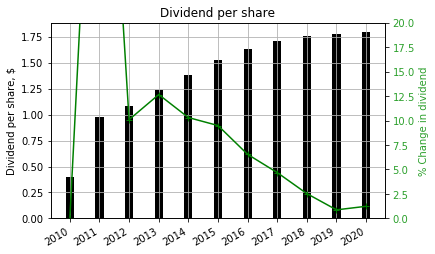

In [65]:
# calculate the percent change in dividends
pcd = np.zeros(len(dps)) # percent change in dividend
for i in range(len(dps[0:-1])):
    pcd[i+1] = ((dps[i+1] - dps[i])/
                dps[i+1])*100

width = 100

# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Dividend per share, $')

# plot revenue as single bar
plt.bar(year_ended_list,dps, width,color='k')

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'

ax2.plot(year_ended_list,pcd,'+-g')
    
ax2.set_ylabel('% Change in dividend',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim((0,20))

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Dividend per share')
plt.show()

In [66]:
print('average dividend growth rate: {:.2f}%'.format(pcd[1:].mean()))

average dividend growth rate: 11.74%


For the past ten years dividends have increased every year.  In 2011 there was a large increase based on  strong free cash flow of \$419 million. The company announced a large dividend increase.

In [67]:
# The Gordon Growth Model
ke = 3/100 # Required rate of return for equity investors
g = pcd[1:].mean()/100 # Growth rate in dividends forever
DPS1 = dps[-1] + dps[-1]*g # Expected Dividends one year from now (next period)
if ke <= g:
    print('ERROR: ke needs to be greater than g')
else:
    print('value of the stock: ${:.2f}'.format(DPS1/(ke-g)))

ERROR: ke needs to be greater than g


**Observations:**  Based on current trends, the DDM predicts a high value for the stock.  

Since the company is not in steady state, let's use a modest dividend growth rate of 2%, the future value is recalculated.

In [68]:
# The Gordon Growth Model
ke = 4/100 # Required rate of return for equity investors
g = 2/100 # Growth rate in dividends forever
print('value of the stock: ${:.2f}'.format(DPS1/(ke-g)))

value of the stock: $100.32


Looking at a future dividend growth rate of 0.5%.

In [69]:
# The Gordon Growth Model
ke = 4/100 # Required rate of return for equity investors
g = 0.5/100 # Growth rate in dividends forever
print('value of the stock: ${:.2f}'.format(DPS1/(ke-g)))

value of the stock: $57.32


In [70]:
# data from yahoo finance, on 9-15-2021
share_price = 52.06
print('dividend yield: {:.1f} %'.format(DPS1/share_price*100))

dividend yield: 3.9 %


## 9) Value analysis  <a id="section9"></a>
The following analysis follows the Warren Buffett strategy as outlined in [3].  This strategy is essentially value investing where companies are chosen that meet a set of criteria and who's stock price is below the intrinsic value plus a margin of safety.  These investments are usually held for the long term.  

Outline:   
- [Business metrics](#section9-1)
 - simple and understandable
 - favorable long term prospects
- [Management metrics](#section9-2)
 - consistent operating history
 - candor
 - rationality: focus on core aspects, only invest in high ROE businesses, focus on shareholder equity
- [Financial metrics](#section9-3)
 - Dividend yield  
 - Payout ratio  
 - Return on equity  
 - Return on Assets  
 - Debt to equity  
 - Profit Margin  
 - Safety margin 
 - One dollar premise
- [Market metrics](#section9-4)
 - The price is determined by the market. The value is determined by the analyst.
 - What is the value of the business?
 - Can the business be purchased at a discount to it's value?

### Business metrics <a id="section9-1"></a>

**Simple and understandable**  
Not examined.

**Favorable long term prospects**  
Not examined.

**Commodity Reliance**  
Not examined.

### Management metrics <a id="section9-2"></a>

**Consistent operating history**  
Not examined. 

**Candor**  
Not examined.

**Rationality**  
Not examined.

Back to [**Contents**](#section0)  

### Financial metrics <a id="section9-3"></a>
The following financial metrics are looked at over the evaluation period.  
- Dividend yield  
- Payout ratio  
- Return on equity  
- Return on Assets  
- Debt to equity  
- Profit Margin  
- Safety margin 
- One dollar premise

**Dividend yield**  
Plot the dividend yield history over the evaluation period.

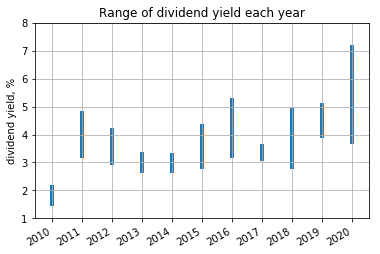

In [71]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

width = 50  # the width of the bars
plt.bar(year_ended_list,(dps/fy_high-dps/fy_low)*100, width,bottom=dps/fy_low*100,label='yield')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.ylim((1,8))
plt.title('Range of dividend yield each year')
plt.ylabel('dividend yield, %')
#plt.legend()
plt.grid()

# show plot
plt.show()

Over the past ten years, the dividend yield has ranged from between 3 and 5 percent, but in 2020 with the stock price falling, the dividend yield has peaked at 7%.  This level of dividend yield would suggest that the stock is reasonably priced.

**Payout ratio**  
The payout ratio is plotted using net income and free cash flow (Net cash provided by operating activities).

In [72]:
#line 0: Net income
net_income = df_metrics.iloc[1].to_numpy()[1:].astype('float')[::-1]
# line 3: Free cash flow, Net cash provided by operating activities 
free_cash_flow =  df_metrics.iloc[4].to_numpy()[1:].astype('float')[::-1]
# line 4: Dividends
dividends =  df_metrics.iloc[5].to_numpy()[1:].astype('float')[::-1]

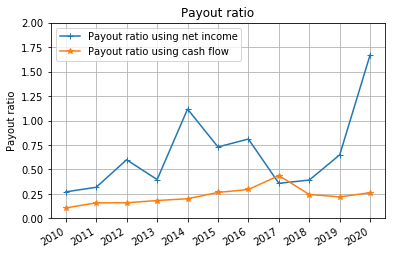

In [73]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Payout ratio')

ax1.plot(year_ended_list,dividends/net_income, '-+',label='Payout ratio using net income')
ax1.plot(year_ended_list,dividends/free_cash_flow, '-*',label='Payout ratio using cash flow')

ax1.tick_params(axis='y')
ax1.set_ylim((0,2))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Payout ratio')
plt.show()

The payout ratio based on income had risen to above one for 2020.  This is a yellow flag.

**Return on equity**  
Sometimes return on equity (RoE) is referred to as stockholder's return on investment. It reveals the rate at which shareholders earn income on their shares. Buffett always looks at RoE to see whether a company has consistently performed well compared to other companies in the same industry. RoE is calculated as follows:

$\text{Return on Equity (RoE)} = \frac {\text{Net Income}} {\text{Shareholder's Equity}}$

Looking at the ROE in just the last year isn't enough. The investor should view the ROE from the past five to 10 years to analyze historical performance.

$\text{Shareholders’ Equity} = \text{Total Assets} − \text{Total Liabilities}$    

For this company, this method of getting Shareholders’ Equity gives negative values.  On the Consolidated Balance Sheets, there is a line for Total stockholders’ equity, which is used.

In [74]:
# line 2: Shareholder equity
shareholder_equity =  df_metrics.iloc[2].to_numpy()[1:].astype('float')[::-1]

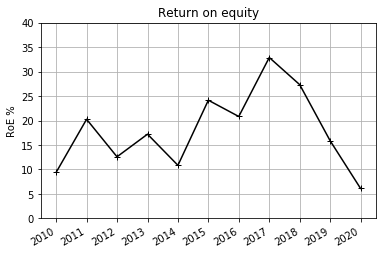

In [75]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('RoE %')

ax1.plot(year_ended_list,net_income/shareholder_equity*100, '-+k')

ax1.tick_params(axis='y')
ax1.set_ylim((0,40))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Return on equity')
plt.show()

**Observation**  
The RoE has fallen for the past four years, this is a red flag.  However, for 2019 and 2020, a case could be made that revenues have fallen as a result of the pandemic, therefore a declining RoE is expected and not as result of management decisions.  

**Return on Assets**   
Return on assets is a profitability ratio that provides how much profit a company is able to generate from its assets. In other words, return on assets (RoA) measures how efficient a company's management is in generating earnings from their economic resources or assets on their balance sheet.

$\text{Return on assets (RoA)} = \frac {\text{Net Income}} {\text{Average Total Assets}}$

Calculating the RoA of a company can be helpful in comparing a company's profitability over multiple quarters and years as well as comparing to similar companies. However, it's important to compare companies of similar size and industry.

For example, banks tend to have a large number of total assets on their books in the form of loans, cash, and investments. A large bank could easily have over \\$2 trillion in assets while putting up a net income that's similar to companies in other industries. Although the bank's net income or profit might be similar to an unrelated company and the bank might have high-quality assets, the bank's RoA will be lower. The larger number of total assets must be divided into the net income, creating a lower RoA for the bank.

Similarly, auto manufacturing requires huge facilities and specialized equipment. A lucrative software company that sells downloadable programs online may generate the same net profits, but it could have a significantly higher ROA than its more asset-heavy counterparts. When utilizing this metric to compare productivity across businesses, it's important to take into account what types of assets are required to function in a given industry, rather than simply comparing the figures.

In [76]:
#line 6: Total assets
total_assets = df_metrics.iloc[6].to_numpy()[1:].astype('float')[::-1]

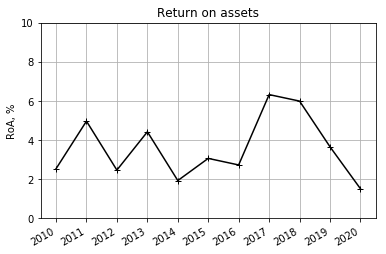

In [77]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('RoA, %')

ax1.plot(year_ended_list,net_income/total_assets*100, '-+k')

ax1.tick_params(axis='y')
ax1.set_ylim((0,10))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Return on assets')
plt.show()

**Observation:**  
The RoA has fallen for the past four years, this would normally be a red flag, however some consideration needs to be made for the pandemic.

**Debt to equity**   
The debt-to-equity ratio (D/E) is another key characteristic Buffett considers carefully. Buffett prefers to see a small amount of debt so that earnings growth is being generated from shareholders' equity as opposed to borrowed money. The D/E ratio is calculated as follows:

$\text{Debt-to-Equity Ratio} = \frac {\text{Total Liabilities}} {\text{Shareholders' Equity}}$

This ratio shows the proportion of equity and debt the company uses to finance its assets, and the higher the ratio, the more debt—rather than equity—is financing the company. A high debt level compared to equity can result in volatile earnings and large interest expenses. For a more stringent test, investors sometimes use only long-term debt instead of total liabilities in the calculation above.

In [78]:
#line 2: Total liabilities
total_liabilities = df_metrics.iloc[3].to_numpy()[1:].astype('float')[::-1]

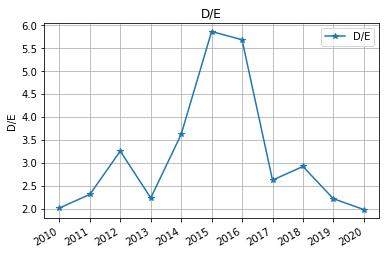

In [79]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('D/E')

ax1.plot(year_ended_list,total_liabilities/shareholder_equity, '-*',label='D/E')

ax1.tick_params(axis='y')
#ax1.set_ylim((0.8,1.0))
ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('D/E')
plt.show()

**Observation:**  
The D/E ratio has been falling for the last four years and is now at two.

**Profit Margin**  
A company's profitability depends not only on having a good profit margin, but also on consistently increasing it. This margin is calculated by dividing net income by net sales. For a good indication of historical profit margins, investors should look back at least five years. A high-profit margin indicates the company is executing its business well, but increasing margins mean management has been extremely efficient and successful at controlling expenses.

$\text{Profit margin} = \frac {\text{net income}} {\text{net sales}}$


In [80]:
#line 0: Total revenue
total_revenue = df_metrics.iloc[0].to_numpy()[1:].astype('float')[::-1]

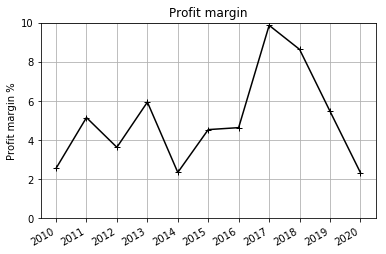

In [81]:
# Set the locator
locator = mdates.YearLocator()  # every year
fmt = mdates.DateFormatter('%Y')

fig, ax1 = plt.subplots()
ax1.set_ylabel('Profit margin %')

ax1.plot(year_ended_list,net_income/total_revenue*100, '-+k')

ax1.tick_params(axis='y')
ax1.set_ylim((0,10))
#ax1.legend()
plt.grid()

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()

plt.title('Profit margin')
plt.show()

**Observation:**  
The profit margin has been falling for the past four years, a ref flag, however some consideration needs to be made for the pandemic.  Page 3 of the Fidelity report compares Operating Margin of the company to 5 peers.

**Safety margin**  
A safety margin is the difference between the intrinsic stock value and the market price of the stock.  The margin accounts for uncertainty in the estimations and methods used in the analysis.  The safety margin doesn't always have to be the same number and can vary from company to company.

**One dollar premise**  
This is a financial test that shows the strength of the business and how well management has rationality allocated to the company's business.

From a company's income, subtract all dividends paid to shareholders.  What is left over is the company's retained earnings.  Now add the company's retained earnings over a 10 year period.  Next determine the difference between the company's current market value and its market value 10 years ago.  If the business has employed retained earnings unproductively over this ten year period, the market eventually catches up and will set a lower price on the business. 

In [82]:
retained_earnings = net_income.sum() - dividends.sum()
print('retained_earnings: ${:,.2f}B'.format(retained_earnings/1e9))

retained_earnings: $5.60B


In [83]:
# Current market value, share price multiplied by number of shares
cmv_high = df_dcf_data['shares_outstanding'].iloc[-1]*fy_high[-1]
cmv_low = df_dcf_data['shares_outstanding'].iloc[-1]*fy_low[-1]
print('Current market value: ${:,.2f}B to ${:,.2f}B'.format(cmv_low/1e9,cmv_high/1e9))

Current market value: $11.21B to $22.10B


In [84]:
# Past market value, share price multiplied by number of shares
pmv_high = df_dcf_data['shares_outstanding'].iloc[0]*fy_high[0]
pmv_low = df_dcf_data['shares_outstanding'].iloc[0]*fy_low[0]
print('Past market value: ${:,.0f}B to ${:,.0f}B'.format(pmv_low/1e9,pmv_high/1e9))

Past market value: $8B to $12B


In [85]:
print('Difference in market value: ${:,.0f}B to ${:,.0f}B'.format((cmv_low-pmv_low)/1e9,(cmv_high-pmv_high)/1e9))

Difference in market value: $3B to $10B


The retained earnings of \\$5B produced an increase in market value of $3B to $10B, which is not that impressive.

**Plot share price vs EPS**  
Looking at the one dollar premise in terms of share price and EPS.  

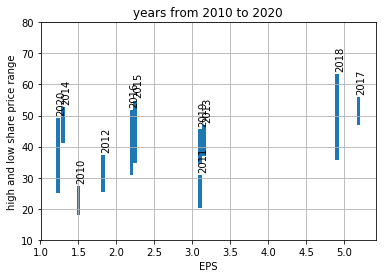

In [86]:
# plotting the eps data points
ax = plt.bar(EPS,fy_high-fy_low,width = .05,bottom=fy_low)
plt.grid()
plt.ylim((10,80))
plt.ylabel('high and low share price range')
plt.xlabel('EPS')
plt.title('years from 2010 to 2020')

rects = ax.patches

# Make some labels.
labels = [year_ended_list[i].strftime("%Y") for i in range(len(year_ended_list))]
for rect, label in zip(rects, labels):
    y_top =  rect.get_y() + rect.get_height()
    plt.text(rect.get_x(), y_top+1, label, rotation=90,va='bottom')    

plt.show()

**Observations:**  
The range over which the price varies appears to be flat with respect to the EPS.  This indicates the stock market is not following this company’s earnings and the prospect of price appreciation is small.

### Market metrics <a id="section9-4"></a>
The share price is determined by the market. The value is determined by the analyst. 

## 10) Peer analysis   <a id="section10"></a>
See the Fidelity report, the company seems to be in the middle of its peers.

## 11) Conclusion  <a id="section11"></a>
Reviewing the findings from each section

Quick look:  the dividend reduction is a red flag
- NACI stock selection guide analysis: Revenues are flat, EPS variable a slight positive slope except for the last three years.  The estimated price range in 5 years: 54.63 to 80.60.  This indicates the price is near the fair value.
- Discounted cash flow analysis, base line: the average revenue growth rate is -3.08%.  The average debt growth rate is -2.45%.  The intrinsic stock value is \\$112.66 which is greater than the current stock price of \\$54.39
- Dividend Discount Model: dividends paid is increasing every year (except for 2021)
- Value analysis: Return on equity is variable but trending down the last 4 years. Return on Assets is variable but trending down the last 4 years. D/E now at 2, but was as high as 6. Profit margin is variable but trending down the last 4 years. One dollar premise shows retained earnings of \\$5.60B producing an increase in market value: \\$3B to \\$10B. The plot share price vs EPS is flat over the years. There are a number of red flags here.  

My concerns: The recent revenue growth is mainly flat, but RoE, RoA and PM are trending down.

Conclusion: do not buy.  Wait for dust to settle from dividend reduction. 


## 12) Notes  <a id="section12"></a>
Various notes that 


**Negative working capital**  
The company has a negative working capital rate. Negative working capital describes a situation where a company's current liabilities exceed its current assets as stated on the firm's balance sheet. In other words, there is more short-term debt than there are short-term assets. 

Negative working capital most often arises when a business generates cash very quickly because it can sell products to its customers before it has to pay the bills to its vendors for the original goods or raw materials. In this way, the company is effectively using the vendor's money to grow. 


#### The following notes outline the changes to the DCF model for financial and REIT companies.  

**Valuing a REIT**  
Notes from Valuepro Book, page 237  

- NOPM: To calculate operating income take rental revenue and subtracted total real estate expenses and G&A expenses. To arrive at the NOPM divide the adjusted income from real estate by real estate rental revenue. For the REIT, take income from real estate, which includes depreciation and amortization, and subtract GSA. Exclude other income, gains on sale of real estate and interest expenses.
- REIT has no traditional R&D costs

REIT is not taxed at the corporate level, tax rate: should be near zero.

Depreciation and capital expenditures are significantly higher for REITs than in other companies.

New property acquisitions are not directly accounted for in the DCF model for a REIT.

- Working capitol: accounts payable, rents and security deposits
 - Short term assets: cash, rents and other receivables and prepaid expenses
 - Short term liabilities: accounts payable, advance rents security deposits
 
Working capital is almost zero, which is similar to other financial companies.

The consolidated balance sheet lists the assets as: 
- Real estate held for investment, at cost:
 - Land
 - Buildings and improvements
 - Total real estate held for investment, at cost
 - Less accumulated depreciation and amortization
 - Real estate held for investment, net
- Real estate and lease intangibles held for sale, net
- Cash and cash equivalents <- current asset
- Accounts receivable, net <- current asset
- Lease intangible assets, net
- Other assets, net

The line items indicated above have been taken to be the current assets. Intangibles and long term items have been excluded.

The consolidated balance sheet lists the liabilities as: 
- Distributions payable <- current liabilities
- Accounts payable and accrued expenses <- current liabilities
- Lease intangible liabilities, net
- Other liabilities
- Line of credit payable and commercial paper <- current liabilities
- Term loans, net
- Mortgages payable, net <- current liabilities
- Notes payable, net

The line items indicated above have been taken to be the current liabilities.

**Valuing a financial company**  
Notes from Valuepro Book, page 206  

- Total revenue comes from the total interest and dividend income line on the income statement.  The calculation of operating income is more inclusive for a financial company than for an industrial or high tech company.  For financial companies, operating revenue includes all normal revenue items plus interest income, dividends received and other investment income.

- Cost of Goods Sold (CGS) comes from the Total interest expense line on the statement of income. 
- General and Administrative (G&A) are set to zero since they are included in the interest expense line
- A financial company has no traditional R&D costs

- $\text{Cost of Goods Sold (CGS)} = \text{Total interest expense} + \text{Total non-interest expense}$  
- General and Administrative (G&A) are set to zero since they are included in the interest expense line
- A financial company has no traditional R&D costs

- Depreciation and amortization of premises and equipment from Consolidated Statements of Cash Flows.  
- Amortization of other acquisition-related intangible assets is not included.

- New investment and Depreciation: Property, plant and equipment expenditures and depreciation charges are significantly lower for a financial company.  A typical manufacturing company, in order to grow its business, invests a significant portion of its revenues in plant, property and equipment (PPE).  Financial companies invest very little in the way of PPE.  However, software, risk management systems and acquisitions of other businesses, need to be included.

From the Consolidated Statements of Cash Flows, under Cash Flows from Investing Activities
- Purchases of premises and equipment
- Purchases of leased equipment, net

- Working capital supports manufacturing and service activities of nonfinancial companies.  For financial companies, their principal liabilities  and assets are financial claims that take the place of working capital.  Because there is no differentiation between current and long term assets and liabilities for a financial company, we adjust working capital charges to zero.  A financial company generally invests all of its funds in other financial assets, which have characteristics of current assets rather than PP&E.  
$\text{Accounts Receivable} = 0$  
$\text{Inventories} = 0$  
$\text{Accounts Payable} = 0$  
$\text{working capital} = 0$ 

- Short term assets:  The balance sheets of most financial companies do not separate assets and liabilities into current and long term categories.  When calculating the short term assets take the total assets and subtract goodwill and intangible assets also subtract other assets of questionable value.  Subtract long term assets such as PP&E from total assets.  

$\text{Short term assets} = \text{Total assets} - \text{good will and others of questionable value} - \text{Premises and equipment}$

- A financial company's principal liabilities are deposits, Federal funds purchased, trading account liabilities, insurance policy and claims reserves, contract holder funds and short term borrowing.  To be consistent with the treatment of interest and an operating expense for financial companies, include long term debt in the short term liability category.  
- Short term liabilities:  Include long term debt.  

$\text{Long term debt} = 0$

This company was selected for analysis because it is on the Dividend Aristocrat list and passes the quick look tests.  This notebook will be used as a template when analyzing other companies.

Dividend: Aristocrat, Achiever & Champion
- Aristocrat: S&P 500 Dividend Aristocrats is designed to measure the performance of S&P 500 index constituents that have followed a policy of consistently increasing dividends every year for at least 25 consecutive years.
- Achiever: The Broad Dividend Achievers Index. Eligible companies must be incorporated in the U.S. or its territories, trade on the NYSE, NASDAQ or AMEX, and have increased its annual regular dividend payments for the last 10 or more consecutive years.
 - https://dividendvaluebuilder.com/dividend-achievers-list/
 - https://www.marketbeat.com/dividends/achievers/
- Champion: This list includes companies that had increased their dividend for at least 25 consecutive years, and includes additional companies that had paid higher dividends without having increased the payout in every calendar year.
 - https://dividendvaluebuilder.com/dividend-champions-list/
 - https://www.dividendgrowthinvestor.com/p/dividend-champions-list.html

## 13) References  <a id="section13"></a>

1. O'Hara, Thomas E., and Ken Janke. Starting and Running a Profitable Investment Club: the Official Guide from the National Association of Investors Corporation. Times Business, 1998. 
2. Gray, Gary, et al. Streetsmart Guide to Valuing a Stock: the Savvy Investors Key to Beating the Market. McGraw-Hill, 2004. 
3. Robert G. Hagstrom, The Warren Buffett Way, Wiley, 2013